In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
tf.__version__

'2.16.1'

In [3]:
keras.__version__

'3.2.1'

In [21]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train_full.shape

(50000, 32, 32, 3)

In [6]:
X_train_full.dtype

dtype('uint8')

In [22]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
#X_test = X_test / 255.

In [23]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

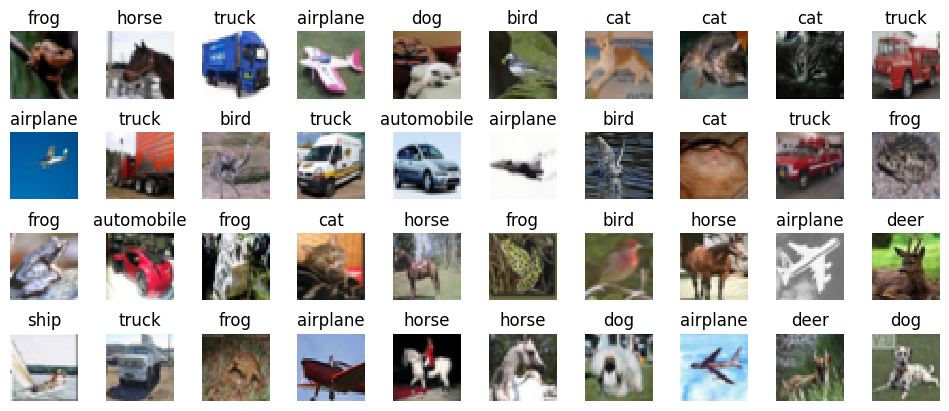

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=(32, 32, 3)))
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

D:\Projects\university\8th-semester\mic\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Rescaling name=rescaling, built=True>,
 <Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]
hidden1.name

'conv2d'

In [15]:
model.get_layer(hidden1.name) is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[[[ 0.11039706, -0.10121708, -0.08068019, -0.02758035,
           0.07197678, -0.08578894,  0.10475844, -0.01470444,
           0.10025008,  0.12393354,  0.13276039,  0.00804524,
           0.01376675, -0.02908644,  0.06048127, -0.0234016 ,
          -0.13477336,  0.11886425, -0.09534781, -0.01322243,
          -0.06315264,  0.0716989 , -0.00375846, -0.01289596,
           0.09981033,  0.02656955, -0.12416091,  0.04861908,
           0.03013235, -0.02146886,  0.1374767 ,  0.0116118 ],
         [ 0.08159751,  0.09111394, -0.12178823, -0.02077098,
          -0.05818473,  0.0928195 , -0.04473673,  0.02579138,
          -0.03751466,  0.10770494,  0.05910574,  0.08581717,
          -0.12313806,  0.1313156 , -0.01599053, -0.06785323,
          -0.06933119, -0.06560485, -0.13543162, -0.05704408,
           0.03530763,  0.07575341, -0.13649389, -0.06192493,
          -0.01903525,  0.11981268,  0.02837919,  0.05050641,
          -0.12030985,  0.03602852, -0.03330136,  0.0688899 ],
      

In [17]:
weights.shape

(3, 3, 3, 32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [19]:
biases.shape

(32,)

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3121 - loss: 1.8269 - val_accuracy: 0.5362 - val_loss: 1.2877
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5450 - loss: 1.2612 - val_accuracy: 0.5704 - val_loss: 1.2259
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6232 - loss: 1.0669 - val_accuracy: 0.6292 - val_loss: 1.0588
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6658 - loss: 0.9486 - val_accuracy: 0.6370 - val_loss: 1.0285
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6983 - loss: 0.8589 - val_accuracy: 0.6888 - val_loss: 0.9058
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7272 - loss: 0.7769 - val_accuracy: 0.6736 - val_loss: 0.9491
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7527 - loss: 0.7099 - val_accuracy: 0.6854 - val_loss: 0.9293
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7667 -

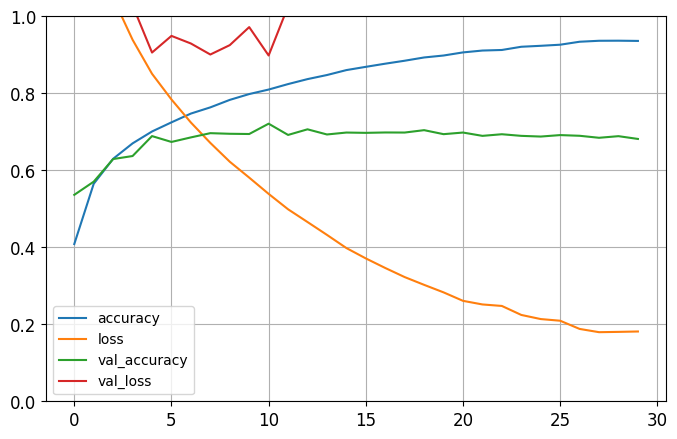

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
pred = model.predict(X_test)
print(pred)

pred_classes = np.argmax(pred, axis=1)

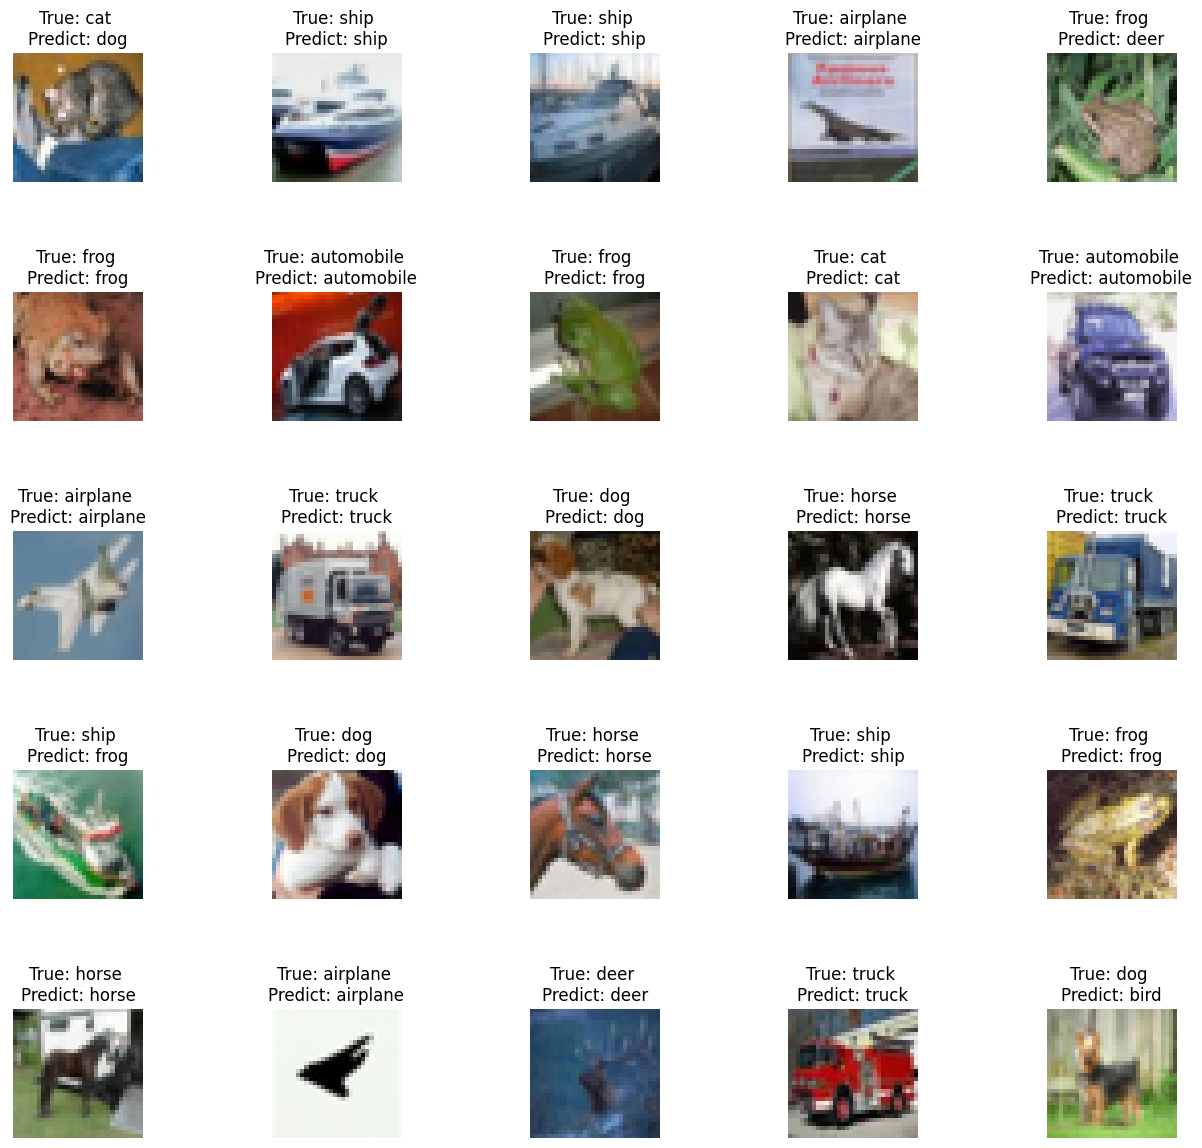

In [27]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test[i][0]], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [28]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6790 - loss: 1.8469


[1.870297908782959, 0.6815000176429749]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.  , 0.  , 0.  , 0.14, 0.  , 0.86, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ]],
      dtype=float32)

In [3]:
house_data = pd.read_csv('kc_house_data.csv')

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_data_labels = house_data['price'].copy()

In [7]:
house_data = house_data.drop(['id', 'price', 'zipcode'], axis=1)

house_data['date'] = pd.to_datetime(house_data['date'])
house_data['month'] = house_data['date'].apply(lambda date:date.month)
house_data['year'] = house_data['date'].apply(lambda date:date.year)
house_data = house_data.drop(['date'], axis=1)

house_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(house_data, house_data_labels, random_state=48)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=48)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [9]:
keras.backend.clear_session()

In [15]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(19, activation="relu"),
    keras.layers.Dense(19, activation="relu"),
    keras.layers.Dense(19, activation="relu"),
    keras.layers.Dense(19, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, batch_size=128, epochs=400, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 441850167296.0000 - val_loss: 431457435648.0000
Epoch 2/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 459214192640.0000 - val_loss: 430935703552.0000
Epoch 3/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 431101444096.0000 - val_loss: 425465774080.0000
Epoch 4/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 407506190336.0000 - val_loss: 399923511296.0000
Epoch 5/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391022116864.0000 - val_loss: 330575282176.0000
Epoch 6/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 292610867200.0000 - val_loss: 216466522112.0000
Epoch 7/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181912584192.0000 - val_loss: 126328283136.0000
Epoch 8/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111289819136.0000 - val_loss: 105244966912.0000
Epoch 9/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106481000448.0000 - val_loss: 103382040576.0000
Epoch 10/400
95/95 ━━━━━━━━━━━━━━━━━━

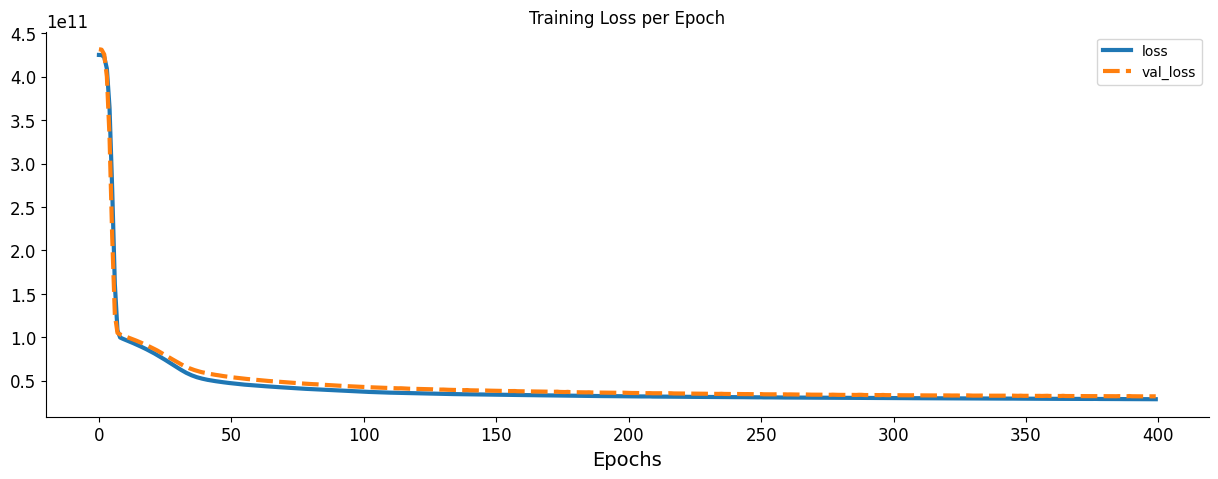

In [16]:
import seaborn as sns

losses = pd.DataFrame(history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [17]:
keras.backend.clear_session()

In [18]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(19, activation="relu")(input_)
hidden2 = keras.layers.Dense(19, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(19, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(19, activation="relu")(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [19]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, batch_size=128, epochs=400, validation_data=(X_valid, y_valid))

Epoch 1/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 424211841024.0000 - val_loss: 431464448000.0000
Epoch 2/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419709386752.0000 - val_loss: 430781431808.0000
Epoch 3/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 418579349504.0000 - val_loss: 421234606080.0000
Epoch 4/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 423834320896.0000 - val_loss: 374740451328.0000
Epoch 5/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 344447188992.0000 - val_loss: 260174381056.0000
Epoch 6/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227019407360.0000 - val_loss: 135711309824.0000
Epoch 7/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117306605568.0000 - val_loss: 105184010240.0000
Epoch 8/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98892840960.0000 - val_loss: 103277191168.0000
Epoch 9/400
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95490531328.0000 - val_loss: 101987139584.0000
Epoch 10/400
95/95 ━━━━━━━━━━━━━━━━━━━━

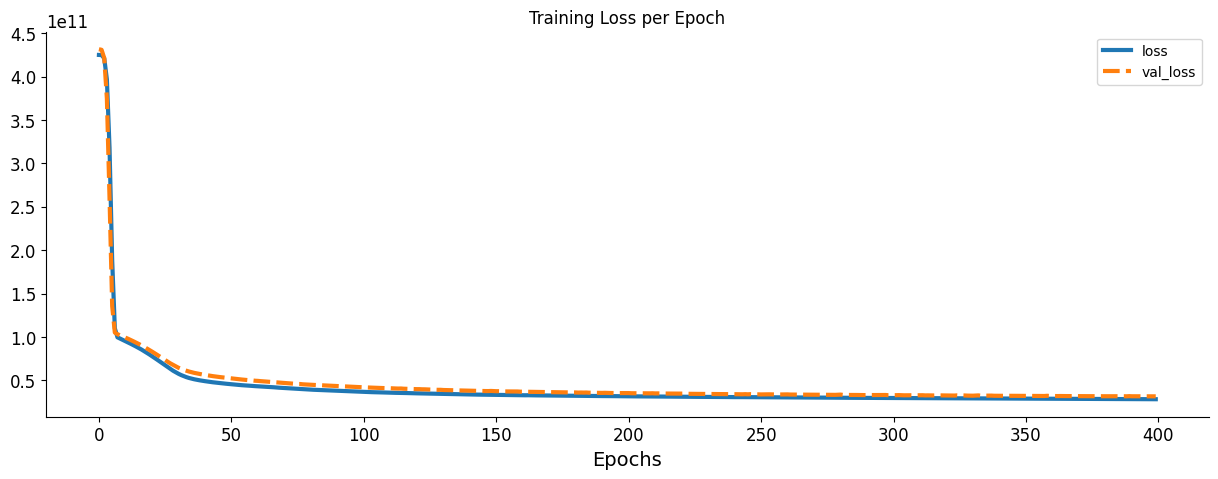

In [20]:
losses = pd.DataFrame(history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()